In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

 Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [14]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [15]:
boston = load_boston()

In [16]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [17]:
boston.data.shape

(506, 13)

In [18]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
X = pd.DataFrame(data = boston.data, columns = boston.feature_names)

In [20]:
X = reduce_mem_usage(X)
X.head()

Memory usage of dataframe is 0.05 MB
Memory usage after optimization is: 0.01 MB
Decreased by 74.8%


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.006321,18.0,2.310547,0.0,0.538086,6.574219,65.18750,4.089844,1.0,296.0,15.296875,397.00,4.980469
1,0.027313,0.0,7.070312,0.0,0.468994,6.421875,78.87500,4.968750,2.0,242.0,17.796875,397.00,9.140625
2,0.027283,0.0,7.070312,0.0,0.468994,7.183594,61.09375,4.968750,2.0,242.0,17.796875,392.75,4.031250
3,0.032379,0.0,2.179688,0.0,0.458008,6.996094,45.81250,6.062500,3.0,222.0,18.703125,394.75,2.939453
4,0.069031,0.0,2.179688,0.0,0.458008,7.148438,54.18750,6.062500,3.0,222.0,18.703125,397.00,5.328125


In [24]:
y = pd.DataFrame(data = boston.target, columns = ['price'])

In [25]:
y = reduce_mem_usage(y)

Memory usage of dataframe is 0.00 MB
Memory usage after optimization is: 0.00 MB
Decreased by 72.7%


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [27]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.023438,0.0,18.093750,0.0,0.613770,5.304688,97.312500,2.101562,24.0,666.0,20.203125,349.500000,24.906250
15,0.627441,0.0,8.140625,0.0,0.538086,5.835938,56.500000,4.500000,4.0,307.0,21.000000,395.500000,8.468750
332,0.034668,35.0,6.058594,0.0,0.437988,6.031250,23.296875,6.640625,1.0,304.0,16.906250,362.250000,7.828125
423,7.050781,0.0,18.093750,0.0,0.613770,6.101562,85.125000,2.021484,24.0,666.0,20.203125,2.519531,23.296875
19,0.725586,0.0,8.140625,0.0,0.538086,5.726562,69.500000,3.796875,4.0,307.0,21.000000,391.000000,11.281250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.171143,0.0,8.562500,0.0,0.520020,5.835938,91.875000,2.210938,5.0,384.0,20.906250,395.750000,18.656250
270,0.299072,20.0,6.960938,0.0,0.464111,5.855469,42.093750,4.429688,3.0,223.0,18.593750,388.750000,13.000000
348,0.015007,80.0,2.009766,0.0,0.435059,6.636719,29.703125,8.343750,4.0,280.0,17.000000,391.000000,5.988281
435,11.164062,0.0,18.093750,0.0,0.740234,6.628906,94.625000,2.125000,24.0,666.0,20.203125,109.875000,23.265625


In [28]:
# using standard scaler

In [29]:
X_train.dtypes

CRIM       float16
ZN         float16
INDUS      float16
CHAS       float16
NOX        float16
RM         float16
AGE        float16
DIS        float16
RAD        float16
TAX        float16
PTRATIO    float16
B          float16
LSTAT      float16
dtype: object

In [30]:
# get all the feature names you want to standardize
feature_names_for_stand = X_train.select_dtypes(include=['float32','float16']).columns.tolist()

In [31]:
feature_names_for_stand

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [32]:
scaler = StandardScaler()

stand_features_train = scaler.fit_transform(X_train[feature_names_for_stand])
stand_features_test = scaler.transform(X_test[feature_names_for_stand])

/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


In [33]:
stand_features_train

array([[ 1.287 , -0.5005,  1.033 , ...,  0.846 , -0.    ,  1.753 ],
       [-0.3364, -0.5005, -0.413 , ...,  1.203 ,  0.    , -0.5615],
       [-0.403 ,  1.014 , -0.7153, ..., -0.635 ,  0.    , -0.652 ],
       ...,
       [-0.4055,  2.959 , -1.304 , ..., -0.5923,  0.    , -0.911 ],
       [ 0.852 , -0.5005,  1.033 , ...,  0.846 , -0.    ,  1.521 ],
       [-0.3813, -0.5005, -0.3518, ...,  1.161 , -0.    , -0.2568]],
      dtype=float16)

In [34]:
X_train[feature_names_for_stand] = stand_features_train
X_test[feature_names_for_stand] = stand_features_test

/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [35]:
from sklearn.manifold import TSNE

In [36]:
tsne = TSNE(n_components = 2, learning_rate =250, random_state = 42)

In [37]:
X_train_tsne = tsne.fit_transform(X_train)

In [38]:
X_train_tsne.shape

(404, 2)

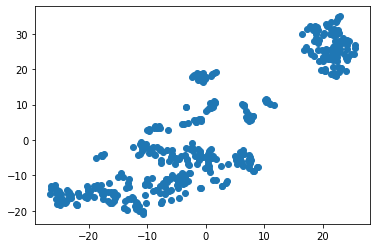

In [39]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [40]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters = 3,max_iter = 100, random_state = 42)

In [42]:
labels_train = kmeans.fit_predict(X_train)

In [43]:
pd.value_counts(labels_train)

1    184
2    136
0     84
dtype: int64

Text(10, 27, 'Кластер 2')

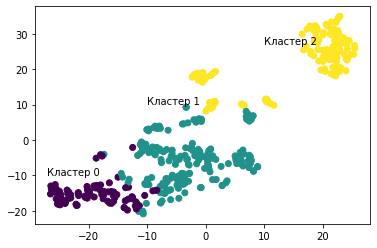

In [44]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], c=labels_train)
plt.text(-27,-10,'Кластер 0')
plt.text(-10,10,'Кластер 1')
plt.text(10,27,'Кластер 2')

In [45]:
print('First cluster', X_train.loc[labels_train==0, 'CRIM'].mean())
print('Second cluster',X_train.loc[labels_train==1, 'CRIM'].mean())
print('Third cluster', X_train.loc[labels_train==2, 'CRIM'].mean())

First cluster -0.3992
Second cluster -0.3594
Third cluster 0.733


In [46]:
print('First cluster:', y_train[labels_train==0].mean())
print('Second cluster:',y_train[labels_train==1].mean())
print('Third cluster:', y_train[labels_train==2].mean())

First cluster: price    27.921875
dtype: float16
Second cluster: price    25.171875
dtype: float16
Third cluster: price    16.390625
dtype: float16


Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [47]:
X_test[feature_names_for_stand] = stand_features_test

/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/Users/oluwadahunsialawode/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [48]:
X_test_tsne = tsne.fit_transform(X_test)
labels_test = kmeans.predict(X_test)

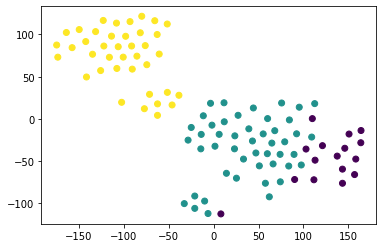

In [49]:
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1], c=labels_test)

In [50]:
print('first cluster', X_test['CRIM'][labels_test == 0].mean())
print('first cluster', X_test['CRIM'][labels_test == 1].mean())
print('first cluster', X_test['CRIM'][labels_test == 2].mean())

first cluster -0.4001
first cluster -0.38
first cluster 0.6284


In [51]:
print('First cluster:', y_test[labels_test==0].mean())
print('Second cluster:',y_test[labels_test==1].mean())
print('Third cluster:', y_test[labels_test==2].mean())

First cluster: price    31.34375
dtype: float16
Second cluster: price    22.046875
dtype: float16
Third cluster: price    16.765625
dtype: float16
